## Data Loadout

In [56]:
import sklearn
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import KFold
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

lol_df = pd.read_csv('games.csv')
lol_df2 = lol_df[['gameDuration', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills']]
lol_data = np.array(lol_df2)
print(lol_data)

[[1949    0    2 ...    0    1    1]
 [1851    0    1 ...    0    0    0]
 [1493    0    2 ...    0    1    0]
 ...
 [2156    1    2 ...    0    2    0]
 [1475    1    2 ...    0    1    0]
 [1445    0    1 ...    0    1    0]]


## Logistic Regression

### Sigmoid Function and Gradient Ascent

In [58]:
# Setting the X and Y matrices
lol_X = lol_df2[['gameDuration', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills']]
lol_X = np.array(lol_X)
lol_Y = lol_df2[['winner']]
lol_Y = np.array(lol_Y)

lol_X_scale = preprocessing.scale(lol_X)
X_train, X_test, y_train, y_test = train_test_split(lol_X_scale, lol_Y, test_size = 0.25, train_size = 0.75, random_state = 42)
y_2d_train = y_train.reshape(y_train.shape[0], 1)
y_2d_test = y_test.reshape(y_test.shape[0], 1)

# Sigmoid function
def sigmoid(z):
    result = 1 / (1 + np.exp(-z))
    return result

# Column of 1's to X
ones = np.ones((X_train.shape[0], 1))
X_train_1 = np.hstack((ones, X_train))
ones = np.ones((X_test.shape[0], 1))
X_test_1 = np.hstack((ones, X_test))

# Initialize w to 0
w_init = np.zeros((X_train_1.shape[1], 1))

# Hypothesis function
def hypothesis(X_train_1, w):
    y_hat = sigmoid(np.dot(X_train_1, w))
    return y_hat

y_hat_init = hypothesis(X_train_1, w_init)

# Gradient ascent
def Gradient_Ascent(X_train_1, y_2d_train, learning_rate, num_iters):
    # Number of training examples.
    N = X_train_1.shape[0]
    # Initialize w(<np.ndarray>). Zeros vector of shape X_train.shape[1],1
    w = np.zeros((X_train_1.shape[1], 1))
    for i in range(num_iters):
        y_hat = hypothesis(X_train_1, w)
        error = y_2d_train - y_hat
        gradient = np.dot(np.transpose(X_train_1), error)
        # Updating Parameters
        w = w + (learning_rate / N) * gradient
        
    return w

# Precision_recall
def precision_recall(y_hat, y, threshold):  
    y_hat_binary = np.copy(y_hat)
    for i in range(y_hat_binary.shape[0]):
        if y_hat_binary[i] < threshold:
            y_hat_binary[i] = 0
        else:
            y_hat_binary[i] = 1

    false_difference = y - y_hat_binary
    false_pos = np.sum(false_difference < 0)
    false_neg = np.sum(false_difference > 0)

    all_trues = np.ones((y.shape[0], 1)) 
    true_difference = all_trues - (y_hat_binary + y)
    true_pos = np.sum(true_difference < 0)

    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    return precision,recall

# F1 score
def f_score(precision, recall):
    score = 2 * ((precision * recall) / (precision + recall))
    return score

# Predict
def predict(X_train_1, w):
    y_hat = hypothesis(X_train_1,w)
    return y_hat

learning_rate = 0.01
num_iters = 10000
w = Gradient_Ascent(X_train_1, y_2d_train, learning_rate, num_iters)

y_hat = predict(X_train_1, w)
precision_train, recall_train = precision_recall(y_hat, y_2d_train, 0.5)
f_score_train = f_score(precision_train, recall_train)

print("Training Accuracy: ", f_score_train)

y_hat_test = predict(X_test_1, w)
precision_test, recall_test = precision_recall(y_hat_test, y_2d_test, 0.5)
f_score_test = f_score(precision_test, recall_test)

print("Testing Accuracy: ", f_score_test)

Training Accuracy:  0.9604231356244408
Testing Accuracy:  0.9611888388269701


### SkLearn Library L1 Regularization

Training Accuracy:  0.9629696765673149
Testing Accuracy:  0.9633341101530335


C:\Users\linam\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Text(0, 0.5, 'Coefficient Value')

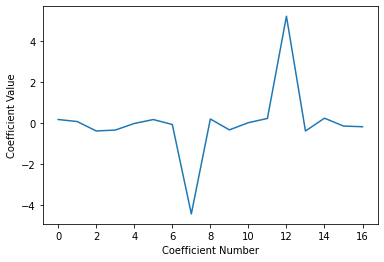

In [59]:
logreg = LogisticRegression(C = 1)
logreg.fit(X_train, y_train)
y_hat_logreg = logreg.predict(X_train)
acc_logreg_train = logreg.score(X_train, y_2d_train)
acc_logreg_test = logreg.score(X_test, y_2d_test)

w_logreg = logreg.coef_
intercept_logreg = logreg.intercept_

print("Training Accuracy: ", acc_logreg_train)
print("Testing Accuracy: ", acc_logreg_test)

plt.plot(w_logreg.flatten())
plt.xlabel('Coefficient Number')
plt.ylabel('Coefficient Value')

### SkLearn Library L2 Regularization

C:\Users\linam\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training Accuracy:  0.9629696765673149
Testing Accuracy:  0.9633341101530335


Text(0, 0.5, 'Coefficient Value')

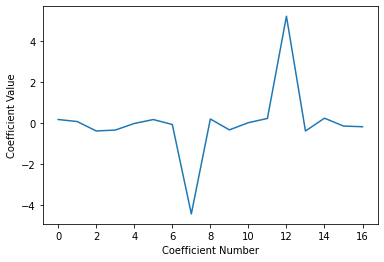

In [60]:
logreg_l2 = LogisticRegression(solver='liblinear', C=1, penalty='l2')
logreg_l2.fit(X_train, y_train)
y_hat_l2 = logreg_l2.predict(X_test)

acc_logreg_l2_train = logreg.score(X_train, y_2d_train)
acc_logreg_l2_test = logreg.score(X_test, y_2d_test)

w_logreg_l2 = logreg.coef_
intercept_logreg_l2 = logreg.intercept_

print("Training Accuracy: ", acc_logreg_l2_train)
print("Testing Accuracy: ", acc_logreg_l2_test)

plt.plot(w_logreg_l2.flatten())
plt.xlabel('Coefficient Number')
plt.ylabel('Coefficient Value')